In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Dataloader import Dataloader
from RamdomForest import RamdomForest
from score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
parm = {
    'learning_rate' : 0.01,
    'n_estimators' : 10000,
    'max_depth' : [32],
    'num_leaves' : [512],
    'feature_fraction' : [0.7]
}

In [3]:
dataloader = Dataloader()
X_train, X_test, y_train, y_test = dataloader.prepare_train_data(df,size = 0.000000001)
"""
parking_price_train = X_train['parking_price'].fillna(0)
parking_price_test  = X_test['parking_price'].fillna(0)
X_train = X_train.drop(['parking_price'],axis=1)
X_test = X_test.drop(['parking_price'],axis=1)
"""

"\nparking_price_train = X_train['parking_price'].fillna(0)\nparking_price_test  = X_test['parking_price'].fillna(0)\nX_train = X_train.drop(['parking_price'],axis=1)\nX_test = X_test.drop(['parking_price'],axis=1)\n"

In [4]:
X_train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,...,VIII_index,IX_index,X_index,XI_index,XII_index,XIII_index,XIV_index,sell_day,sell_day_mon,txn_dt_mon
count,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,...,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000,59878.000000
mean,7.270901,11.413023,19489.226160,7.640753,1.930993,2.319733,11052.337804,1.586576,4.788286,27.958051,...,4.400782,4.063362,3.994522,3.959184,4.705217,3.601222,4.252012,8436.888356,280.747286,649.158990
std,2.164891,4.755144,727.369231,5.069718,1.589358,1.400410,4338.938048,0.778237,3.565845,58.084960,...,0.552896,0.592294,0.487775,0.582093,0.463505,0.866587,0.444361,4408.212081,146.941496,24.251603
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,2.000000,0.000000,2.000000,0.000000,2.000000,5.000000,0.000000,603.000000
25%,8.000000,7.000000,18893.000000,4.000000,0.000000,2.000000,7186.000000,2.000000,2.000000,11.387227,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4933.000000,164.000000,629.000000
50%,8.000000,12.000000,19527.500000,5.000000,1.000000,2.000000,11507.000000,2.000000,4.000000,16.482126,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,8153.000000,271.000000,650.000000
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14491.000000,2.000000,6.000000,35.695055,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,12217.000000,407.000000,670.000000
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,28.000000,5533.304995,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,18287.000000,609.000000,688.000000


In [5]:
ramdom_forest = RamdomForest()
model = ramdom_forest.train_LGBM(X_train, y_train, X_test, y_test,parm,reg_alpha = 5,reg_lambda = 0)# BEST IS reg_alpha = 5 reg_lambda = 0

/home/mmdb/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['III_index', 'II_index', 'IV_index', 'IX_index', 'I_index', 'VIII_index', 'VII_index', 'VI_index', 'V_index', 'XIII_index', 'XII_index', 'XIV_index', 'XI_index', 'X_index', 'building_material', 'building_type', 'building_use', 'city_town', 'parking_price_isna', 'parking_way', 'txn_floor_isna']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[5000]	training's l1: 10079.7	training's rmse: 19731.5	valid_1's l1: 47176.4	valid_1's rmse: 47176.4
[10000]	training's l1: 2676.86	training's rmse: 7155.28	valid_1's l1: 43247.5	valid_1's rmse: 43247.5
Finished.
depth : 32 leaves : 512 fraction :0.7


In [6]:
model.max_point

10000.986031769467

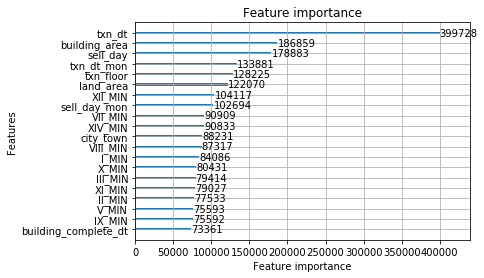

In [7]:
ax = model.plot_feature_important()

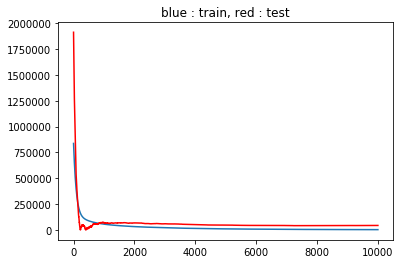

In [8]:
model.plot_loss()

In [9]:
y, y_true= model.predict(X_train,y_train)
hit_rate,point = score(y,y_true)
print(hit_rate)

first part : 9989.645612745917 last part: 0.995457818396963
> 20 % : 0.0001837068706369618
0.9989645612745917


In [10]:
y ,y_true= model.predict(X_test,y_test)
hit_rate,point = score(y,y_true)

first part : 10000.0 last part: 0.9858338940339421
> 20 % : 0.0


In [11]:
hit_rate

1.0

In [12]:
test_df = pd.read_csv("data/test.csv")
build_id = pd.read_csv("data/submit_test.csv")['building_id']
test_df = dataloader.prepare_test_data(test_df)
test_y, _= model.predict(test_df,y_test)
submit_df = pd.DataFrame(data={
    'building_id' : build_id,
    'total_price' : test_y
})
today = str(date.today())
submit_df.to_csv(f'submits/{today}_lightgbm.csv',index = False)

In [13]:
X_test

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,...,X_index,XI_index,XII_index,XIII_index,XIV_index,parking_price_isna,txn_floor_isna,sell_day,sell_day_mon,txn_dt_mon
28272,8,13,18485,5,1,5,5419,2,2.0,13.1061,...,4,5,5,5,5,True,False,13066,435,616


In [14]:
X_test['y_predict'] = y
X_test['y_true'] = y_true
X_test.to_csv("data/X_test.csv",index = False)
    

In [15]:
print(submit_df)

           building_id   total_price
0     X5gsdTWGS3W7JJQB  1.250176e+07
1     BTshNOJyKHnT2YIT  3.957967e+06
2     dhdymr0lV8N5kZOT  1.120267e+07
3     VEwyGGMcD56w5BOc  5.865958e+06
4     wmUeMoJZfsqaSX9b  1.021963e+06
5     EtBjGAHmHCe9t7TZ  2.800716e+06
6     hPNH34vmaZtvBtqc  1.233201e+07
7     wXjeI38bYDMJJwZC  6.259087e+06
8     fxZSGX6aPAFKU8W4  1.660640e+06
9     ewr0Fx6ign87OwaV  4.189772e+06
10    gHKurnEP4AowzsLg  8.921220e+05
11    PmLfTgY2FElLrTl0  6.047579e+06
12    eM2NppIOwzW0o8iy  1.062823e+07
13    dxxwNun97NH4WTrZ  3.583912e+06
14    jykBfhh3vdeFUi3H  4.213874e+06
15    NlXbvdFfmJZf3L18  2.288966e+07
16    D7jaFWHCzSqLBwdt  9.877829e+05
17    L10dBBdqGmemweSl  5.764770e+06
18    OgB0AdiPKlElakKN  1.137474e+06
19    StiWNN1GQrpPBOYt  2.635324e+06
20    a016eMAVQKnfwMnt  1.905594e+07
21    gsCFcQHnOH3AKMcZ  3.531845e+06
22    IbNsDXfsPwSuFpow  5.783083e+06
23    EgAVWOVxD1Jy5YkE  1.285898e+06
24    BrKghvR76XdbQPnx  7.870567e+06
25    a7fxkXTnUGWHUmKG  2.280042e+07
2

In [16]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above
allDone()

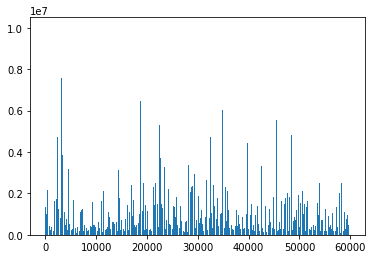

In [17]:
plt.bar(np.arange(len(y_train.values)),y_train.values)
plt.show()

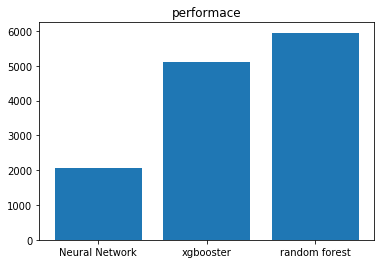

In [22]:
plt.bar(['Neural Network','xgbooster','random forest'],[2058.1,5103.7,5950.5])
plt.title("performace")
plt.show()